In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

In [12]:
# Read in all dataframes
dfs = []
k = 0
for f in os.scandir("./coords"):
    if f.is_file() and f.name != '.DS_Store':
        df = pd.read_csv(f)
        df['class'] = k
        dfs.append(df)
        k += 1
        
dfs[0].head()

,score,nose_score,leftEye_score,rightEye_score,leftEar_score,rightEar_score,leftShoulder_score,rightShoulder_score,leftElbow_score,rightElbow_score,...,rightHip_x,leftKnee_y,leftKnee_x,rightKnee_y,rightKnee_x,leftAnkle_y,leftAnkle_x,rightAnkle_y,rightAnkle_x,class
0,0.565957,0.999123,0.998200,0.996400,0.924315,0.947072,0.957494,0.947747,0.062188,0.152223,...,183.242909,415.273558,215.838174,366.027177,160.726307,527.887454,206.924328,505.618097,131.604030,0
1,0.545799,0.990537,0.991718,0.992416,0.585613,0.289436,0.821773,0.936248,0.396081,0.026364,...,210.280452,478.801242,238.659256,441.879988,143.778982,580.143367,233.357855,505.307716,211.428675,0
2,0.657214,0.998008,0.990955,0.986429,0.671019,0.248268,0.966711,0.986788,0.902529,0.033043,...,299.850258,314.979777,419.893105,349.013720,323.449590,301.494596,337.986366,446.779468,341.193836,0
3,0.588887,0.990551,0.998967,0.999236,0.588298,0.714369,0.787232,0.810225,0.863416,0.685289,...,1023.983170,649.718255,1305.485842,749.196573,1068.610535,686.690766,1214.431514,910.851472,1102.573775,0
4,0.780212,0.998642,0.986117,0.996111,0.916750,0.888298,0.915750,0.875743,0.984774,0.833988,...,141.234296,197.203453,228.542591,236.904748,150.821788,208.283654,167.932071,320.456794,167.368610,0


In [13]:
# Combine and clean
combined_dfs = pd.concat(dfs, ignore_index=True)
combined_dfs = combined_dfs[combined_dfs['score'] > 0]
combined_dfs.head(10)

,score,nose_score,leftEye_score,rightEye_score,leftEar_score,rightEar_score,leftShoulder_score,rightShoulder_score,leftElbow_score,rightElbow_score,...,rightHip_x,leftKnee_y,leftKnee_x,rightKnee_y,rightKnee_x,leftAnkle_y,leftAnkle_x,rightAnkle_y,rightAnkle_x,class
0,0.565957,0.999123,0.998200,0.996400,0.924315,0.947072,0.957494,0.947747,0.062188,0.152223,...,183.242909,415.273558,215.838174,366.027177,160.726307,527.887454,206.924328,505.618097,131.604030,0
1,0.545799,0.990537,0.991718,0.992416,0.585613,0.289436,0.821773,0.936248,0.396081,0.026364,...,210.280452,478.801242,238.659256,441.879988,143.778982,580.143367,233.357855,505.307716,211.428675,0
2,0.657214,0.998008,0.990955,0.986429,0.671019,0.248268,0.966711,0.986788,0.902529,0.033043,...,299.850258,314.979777,419.893105,349.013720,323.449590,301.494596,337.986366,446.779468,341.193836,0
3,0.588887,0.990551,0.998967,0.999236,0.588298,0.714369,0.787232,0.810225,0.863416,0.685289,...,1023.983170,649.718255,1305.485842,749.196573,1068.610535,686.690766,1214.431514,910.851472,1102.573775,0
4,0.780212,0.998642,0.986117,0.996111,0.916750,0.888298,0.915750,0.875743,0.984774,0.833988,...,141.234296,197.203453,228.542591,236.904748,150.821788,208.283654,167.932071,320.456794,167.368610,0
6,0.320456,0.992034,0.989887,0.984465,0.522624,0.356904,0.069622,0.023593,0.009006,0.010524,...,238.211072,827.517187,416.996199,863.073875,251.958108,820.967826,349.356618,1000.234836,284.125446,0
7,0.519308,0.993420,0.969485,0.982689,0.825834,0.199253,0.933107,0.950390,0.258882,0.116492,...,183.545710,308.315362,291.548805,360.077651,190.110716,326.342882,215.612441,422.393876,199.415554,0
8,0.572921,0.998473,0.995711,0.990893,0.612365,0.850215,0.690414,0.993599,0.969429,0.174427,...,174.207011,259.229171,204.357354,227.566659,112.585318,328.002699,192.046343,232.811221,166.650798,0
9,0.654948,0.996756,0.998862,0.994826,0.919350,0.862116,0.939991,0.860165,0.862497,0.301358,...,680.227274,422.080787,869.131618,482.840862,706.028387,472.031740,780.380224,632.819678,726.409162,0
11,0.323536,0.997084,0.952093,0.993184,0.603156,0.211177,0.167704,0.154886,0.002687,0.002500,...,229.334778,655.863441,293.504668,588.751114,134.437047,773.191254,289.832523,642.420684,260.400296,0


In [14]:
# Create ground truth y
y = []

# Grab every possible combination of 2 rows
for index in list(combinations(combined_dfs.index,2)):
    y.append(int(combined_dfs['class'][index[0]] == combined_dfs['class'][index[1]]))

In [15]:
def scale_transform_normalize(coords):
    """
    Parameters:
    coords (df): dataframe of (x,y) coordinates

    Returns:
    df: coords scaled to 1x1 with center at (0,0)
    """
    x_cols = [col for col in coords if col.endswith('x')]
    y_cols = [col for col in coords if col.endswith('y')]
    x_diff = coords[x_cols].max(axis=1) - coords[x_cols].min(axis=1)
    y_diff = coords[y_cols].max(axis=1) - coords[y_cols].min(axis=1)
    diff_max = pd.concat([x_diff, y_diff], axis=1).max(axis=1)

    coords[x_cols] = coords[x_cols].subtract(coords[x_cols].mean(axis=1), axis=0)\
                                   .div(diff_max, axis=0)
    coords[y_cols] = coords[y_cols].subtract(coords[y_cols].mean(axis=1), axis=0)\
                                   .div(diff_max, axis=0)
    coords.div(coords.pow(2, axis=1).sum(axis=1), axis=0)
    return coords

In [16]:
# Scale, transform, normalize vectors
filter_col = [col for col in combined_dfs if col.endswith('x') or col.endswith('y')]
coords = combined_dfs[filter_col]
scale_transform_normalize(coords)
coords.head()

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,nose_y,nose_x,leftEye_y,leftEye_x,rightEye_y,rightEye_x,leftEar_y,leftEar_x,rightEar_y,rightEar_x,...,rightHip_y,rightHip_x,leftKnee_y,leftKnee_x,rightKnee_y,rightKnee_x,leftAnkle_y,leftAnkle_x,rightAnkle_y,rightAnkle_x
0,-0.311684,0.014952,-0.326337,0.033550,-0.326339,-0.004652,-0.319716,0.061064,-0.321941,-0.032391,...,0.079726,-0.040541,0.430457,0.029852,0.324103,-0.089169,0.673661,0.010602,0.625567,-0.152062
1,-0.184686,0.007511,-0.200212,0.035779,-0.198868,-0.003183,-0.185724,0.058371,-0.179296,-0.022652,...,0.190338,-0.042335,0.436492,0.014741,0.362236,-0.176084,0.640314,0.004079,0.489803,-0.040025
2,-0.306981,-0.018699,-0.325959,0.009511,-0.326504,-0.031812,-0.300563,0.045630,-0.306108,-0.048140,...,0.173605,-0.072639,0.349714,0.222261,0.433323,-0.014665,0.316586,0.021047,0.673496,0.028926
3,-0.310889,-0.025081,-0.335065,-0.003353,-0.334980,-0.048589,-0.315529,0.020977,-0.313853,-0.080345,...,0.141180,-0.102852,0.331292,0.256816,0.458393,-0.045833,0.378531,0.140479,0.664935,-0.002439
4,-0.300617,-0.023632,-0.319211,-0.000994,-0.319503,-0.043493,-0.302589,0.035667,-0.305643,-0.079776,...,0.161602,-0.058700,0.267240,0.234037,0.400354,-0.026554,0.304391,0.030815,0.680497,0.028926


In [17]:
# Get y_pred
y_pred = []
# coords = coords.fillna(0)

# Grab every possible combination of 2 rows
for index in list(combinations(coords.index,2)):
    vec_1 = coords.loc[index[0]].values.reshape((1,34))
    vec_2 = coords.loc[index[1]].values.reshape((1,34))
    cosine_score = cosine_similarity(vec_1, vec_2)[0]
    y_pred.append(cosine_score)

AUC: 0.952


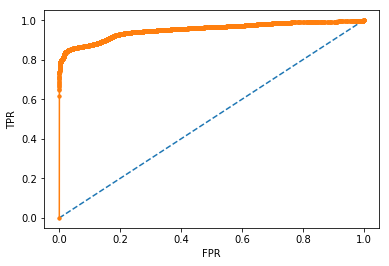

In [18]:
# Check ROC, AUC
fpr, tpr, thresholds = roc_curve(y, y_pred)
auc = roc_auc_score(y, y_pred)
print('AUC: %.3f' % auc)

# Plot
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [19]:
print(thresholds)

[ 2.          1.          0.99490291 ... -0.5982616  -0.60705004
 -0.71089826]


In [20]:
combined_dfs.shape

(335, 53)